In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
from pandas import DataFrame
import pandas as pd

from fastai.text import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path_to_zip = '/content/drive/My\ Drive/fast_ai/datasets/605165_1085454_bundle_archive.zip'

In [4]:
! unzip -q {path_to_zip} 

In [5]:
cols=['message', 'emotion']

In [6]:
train = pd.read_csv('/content/train.txt', sep=';', names=cols)

In [7]:
val = pd.read_csv('/content/val.txt', sep=';', names=cols)

In [8]:
train = train[['emotion', 'message']]
val = val[['emotion', 'message']]
train.head(), val.head()

(   emotion                                            message
 0  sadness                            i didnt feel humiliated
 1  sadness  i can go from feeling so hopeless to so damned...
 2    anger   im grabbing a minute to post i feel greedy wrong
 3     love  i am ever feeling nostalgic about the fireplac...
 4    anger                               i am feeling grouchy,
    emotion                                            message
 0  sadness  im feeling quite sad and sorry for myself but ...
 1  sadness  i feel like i am still looking at a blank canv...
 2     love                     i feel like a faithful servant
 3    anger                  i am just feeling cranky and blue
 4      joy  i can have for a treat or if i am feeling festive)

In [9]:
train_lm = pd.concat([train, val], ignore_index=True)
train_lm.head()

,emotion,message
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [10]:
path = Path('/content/')
path

PosixPath('/content')

In [11]:
train_data = TextClasDataBunch.from_df(path, train_lm, val)
train_data.valid_ds

LabelList (2000 items)
x: TextList
xxbos i m feeling quite sad and sorry for myself but ill snap out of it soon,xxbos i feel like i am still looking at a blank canvas blank pieces of paper,xxbos i feel like a faithful xxunk,xxbos i am just feeling cranky and blue,xxbos i can have for a treat or if i am feeling festive
y: CategoryList
sadness,sadness,love,anger,joy
Path: /content

## **Numericalization**

In [ ]:
train_data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'i']

In [ ]:
train_data.train_ds

LabelList (16000 items)
x: TextList
xxbos i did nt feel humiliated,xxbos i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,xxbos i m grabbing a minute to post i feel greedy wrong,xxbos i am ever feeling nostalgic about the fireplace i will know that it is still on the property,xxbos i am feeling grouchy
y: CategoryList
sadness,sadness,anger,love,anger
Path: /content

In [12]:
data = (TextList.from_df(train_lm, path, cols='message').split_by_rand_pct(0.1).label_for_lm().databunch(bs=50))

In [13]:
data.valid_ds

LabelList (1800 items)
x: LMTextList
xxbos i feel a xxunk of anger because it still pains me to think of xxunk being abused like that but i can t help wonder now if he might be right,xxbos i are another reason why foreign xxunk feel reluctant to drive in this island,xxbos i feel like i am doomed to spend the rest of my life in customer service i,xxbos i feel very distraught tonight,xxbos i feel thankful for everything in my life every day
y: LMLabelList
,,,,
Path: /content

In [14]:
data.show_batch()

idx,text
0,little burdened lately was nt sure why that was xxbos i ve been taking or xxunk or times xxunk amount and i ve fallen asleep a lot faster but i also feel like so funny xxbos i feel as confused about life as a teenager or as jaded as a year old man xxbos i have been with xxunk for years i feel that xxunk has xxunk well and made
1,to you about but with the limited time we have on the phone and with our current xxunk i feel hesitant to bring it up xxbos i am beginning to feel that there s a good chance i might pass xxbos i feel like i have a little more control and can help sweet xxunk better if i know what is ahead xxbos i feel like i m on the
2,what other people love need have to have can t live without so i am hoping you will share your xxunk in the comments xxbos i feel strange with it because it started to be sale xxbos i always notice even though she is fabulous at hiding it according to the rest of the world and feel it xxunk and am greatly distressed xxbos i feel so shaken and guilty
3,think we i can get caught up in the nature of being busy of feeling the need to fill each moment with industry of some sort of xxunk blank spaces with effort and xxunk xxbos i am feeling very fearful that things are nt going to go the way i want them to with my ex xxbos i honestly feel kind of embarrassed and a bit guilty xxbos i said
4,by and not judged because i do feel that people feel judged by me xxbos i has for this other woman she feels greedy and wants xxunk all for herself xxbos i can admit that even though i feel horrible now xxbos i feel almost angry that i have been fed like a lab rat for so many years xxbos i feel myself getting agitated over something insignificant or feeling


In [36]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


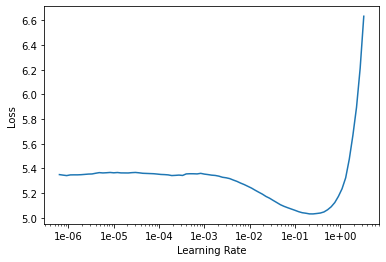

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.265866,3.972008,0.278000,00:31


In [40]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.917628,3.897540,0.289896,00:39
1,3.843848,3.846695,0.297065,00:39
2,3.723910,3.823712,0.298260,00:39
3,3.533614,3.843393,0.297221,00:39
4,3.280990,3.909487,0.292701,00:39
5,3.007471,3.981249,0.288078,00:39
6,2.720244,4.100595,0.281792,00:39
7,2.505720,4.189005,0.279247,00:39
8,2.363883,4.233510,0.277740,00:39
9,2.303160,4.254004,0.276545,00:39


In [43]:
learn.save('lang-model')

In [44]:
learn.load('lang-model')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (16200 items)
x: LMTextList
xxbos i did nt feel humiliated,xxbos i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,xxbos i m grabbing a minute to post i feel greedy wrong,xxbos i am ever feeling nostalgic about the fireplace i will know that it is still on the property,xxbos i am feeling grouchy
y: LMLabelList
,,,,
Path: /content;

Valid: LabelList (1800 items)
x: LMTextList
xxbos i feel a xxunk of anger because it still pains me to think of xxunk being abused like that but i can t help wonder now if he might be right,xxbos i are another reason why foreign xxunk feel reluctant to drive in this island,xxbos i feel like i am doomed to spend the rest of my life in customer service i,xxbos i feel very distraught tonight,xxbos i feel thankful for everything in my life every day
y: LMLabelList
,,,,
Path: /content;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder):

In [46]:
learn.predict('I am in sadness', 20, temperature=1.1, min_p=0.001)

'I am in sadness because my beloved brother died during my run xxbos i would feel like it only gets useful in to better'

In [ ]:
learn.export('emotions.pkl')

In [47]:
learn.save_encoder('lang_model_enc')

In [ ]:
src = '/content/emotions.pkl' 
dest = '/content/drive/My\ Drive/fast_ai/export_files'

In [ ]:
! cp {src} {dest}

## **Classifier**

In [32]:
path_to_pkl = '/content/drive/My\ Drive/fast_ai/export_files/emotions.pkl'

In [51]:
train_lm['emotion']

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
17995    sadness
17996        joy
17997        joy
17998        joy
17999        joy
Name: emotion, Length: 18000, dtype: object

In [61]:
data_class = TextList.from_df(train_lm, path, cols='message', vocab=data.vocab).split_by_rand_pct(0.1).label_from_df(cols=0).databunch(bs=50)

In [73]:
data_class.classes

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [63]:
learn_class = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.5)
learn_class.load_encoder('lang_model_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (16200 items)
x: TextList
xxbos i did nt feel humiliated,xxbos i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,xxbos i m grabbing a minute to post i feel greedy wrong,xxbos i am ever feeling nostalgic about the fireplace i will know that it is still on the property,xxbos i am feeling grouchy
y: CategoryList
sadness,sadness,anger,love,anger
Path: /content;

Valid: LabelList (1800 items)
x: TextList
xxbos i know what i believe and how i feel but some part of me is still hesitant because the old me would have said that anyone who believed there was a god was crazy,xxbos i am feeling a bit gloomy i guess,xxbos i can not help this feeling i am more considerate care of the owner,xxbos i was thinking about this last night i thought about what i tell my own daughter each day and wondered if she feels as stressed as these students do,xxbos i feel like an idiot for looking a bunch of

In [65]:
learn_class.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


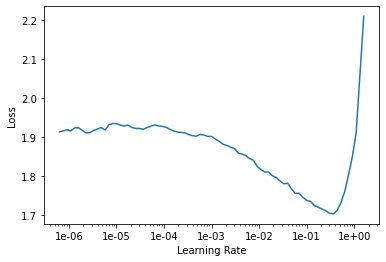

In [66]:
learn_class.recorder.plot()

In [69]:
learn_class.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.277535,1.237555,0.517222,00:17
1,1.286867,1.222825,0.533889,00:17
2,1.294204,1.216464,0.526667,00:17
3,1.234619,1.182697,0.542778,00:17
4,1.211327,1.180484,0.546667,00:17


In [202]:
message = input('Message: ')
pred = learn_class.predict(message)
print (learn_class.data.classes[pred[1]])

Message: he feels left out when he is with you guys
sadness


In [140]:
'Done'

'Done'